In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re

In [2]:
df = pd.read_csv('mal-anime.csv')
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [3]:
print(df.columns)

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')


In [4]:
# Step 1: Extract the 'genre' column from the dataframe
genres = df['Genres']

# Step 2: Split the genres by comma and strip any leading or trailing spaces
split_genres = genres.str.split(',').apply(lambda x: [i.strip() for i in x])

# Step 3: Flatten the list of genres and find the unique genres
unique_genres = pd.unique([item for sublist in split_genres for item in sublist])

# Step 4: Print the unique genres
print(unique_genres)

# Step 5: For each unique genre, create a new column in the dataframe. 
# If the genre is in the anime's genre list, set the value to 1, otherwise 0.
for genre in unique_genres:
    df[genre] = split_genres.apply(lambda x: 1 if genre in x else 0)
df.rename(columns={'Unknown': 'Unknown_Genre'}, inplace=True)
print(df.columns)

['Action' 'Adventure' 'Comedy' 'Drama' 'Sci-Fi' 'Space' 'Mystery'
 'Shounen' 'Police' 'Supernatural' 'Magic' 'Fantasy' 'Sports' 'Josei'
 'Romance' 'Slice of Life' 'Cars' 'Seinen' 'Horror' 'Psychological'
 'Thriller' 'Super Power' 'Martial Arts' 'School' 'Ecchi' 'Vampire'
 'Military' 'Historical' 'Dementia' 'Mecha' 'Demons' 'Samurai' 'Game'
 'Shoujo' 'Harem' 'Music' 'Shoujo Ai' 'Shounen Ai' 'Kids' 'Hentai'
 'Parody' 'Yuri' 'Yaoi' 'Unknown']


C:\Users\thedh\AppData\Local\Temp\ipykernel_4840\242124345.py:8: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_genres = pd.unique([item for sublist in split_genres for item in sublist])


Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Action',
       'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen',
       'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei',
       'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological',
       'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire',
       'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai',
       'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown_Genre'],
      dtype='objec

In [5]:
# # Step 1: Extract the 'studios' column from the dataframe
# studios = df['Studios']

# # Step 2: Split the studios by comma and strip any leading or trailing spaces
# split_studios = studios.str.split(',').apply(lambda x: [i.strip() for i in x])

# # Step 3: Flatten the list of studios and find the unique studios
# unique_studios = pd.unique([item for sublist in split_studios for item in sublist])

# # Step 4: Print the unique studios
# print(unique_studios)

# # Step 5: For each unique studio, create a new column in the dataframe. 
# # If the studio is in the anime's studio list, set the value to 1, otherwise 0.
# for studio in unique_studios:
#     df[studio] = split_studios.apply(lambda x: 1 if studio in x else 0)
# df.rename(columns={'Unknown': 'Unknown_Studio'}, inplace=True)

In [6]:
# # Step 1: Extract the 'Type' column from the dataframe
# types = df['Type']

# # Step 2: Find the unique types
# unique_types = pd.unique(types)

# # Step 3: Print the unique types
# print(unique_types)

# # Step 4: For each unique type, create a new column in the dataframe. 
# # If the type matches the anime's type, set the value to 1, otherwise 0.
# for type_ in unique_types:
#     df[type_] = types.apply(lambda x: 1 if type_ == x else 0)
# df.rename(columns={'Unknown': 'Unknown_Type'}, inplace=True)
# print(df.columns)

In [7]:
print(len(df[df["Episodes"] == "Unknown"]["Name"]))
print(df[df["Episodes"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Episodes' column (All ongoing anime or missing data)
df = df[df['Episodes'] != 'Unknown']
print(len(df[df["Score"] == "Unknown"]["Name"]))
print(df[df["Score"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Score' column (I'm thinking of using score as Y)
df = df[df['Score'] != 'Unknown']
df = df[df['Ranked'] != 'Unknown']
df = df[df['Aired'] != 'Unknown']

516
11                     One Piece
211              Detective Conan
871             Crayon Shin-chan
1093            Nintama Rantarou
1787          Sore Ike! Anpanman
2203                   Sazae-san
3650                   Ojarumaru
4477    Chibi Maruko-chan (1995)
5040                    Knyacki!
5334                   Hanakappa
Name: Name, dtype: object
4730
1404                                     Obake no Q-tarou
1504                                      PostPet Momobin
1578                           Shibawanko no Wa no Kokoro
1699                              Silk Road Shounen Yuuto
1893    Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...
1990    Kouchuu Ouja Mushiking Super Battle Movie: Yam...
2165                                  Touma Kishinden Oni
2422            Dorami-chan: Wow, The Kid Gang of Bandits
2425                   Dorami-chan: Hello Kyouryuu Kids!!
2428                        Dorami-chan: A Blue Straw Hat
Name: Name, dtype: object


In [8]:
import re

# Initialize an empty list to store the smallest years
smallest_years = []

# Loop through each value in the 'Aired' column
for aired in df['Aired']:
    # Extract all years using regular expressions
    years = re.findall('(\d{4})', aired)
    
    # Convert the years to integers
    years = [int(year) for year in years]
    
    # If the list of years is not empty, find the smallest year and append it to the list
    if years:
        smallest_years.append(min(years))
    # If the list of years is empty, append a NaN value to the list
    else:
        smallest_years.append(np.nan)

# Replace the 'Aired' column with the smallest years
df['Aired'] = smallest_years
print(df['Aired'].head())

0    1998
1    2001
2    1998
3    2002
4    2004
Name: Aired, dtype: int64


In [9]:
# # Step 1: Extract the 'Rating' column from the dataframe
# ratings = df['Rating']

# # Define the unique ratings
# unique_ratings = ["G", "PG", "PG-13", "R", "R+", "Rx"]

# # For each unique rating, create a new column in the dataframe. 
# # If the rating is contained in the anime's rating string, set the value to 1, otherwise 0.
# for rating in unique_ratings:
#     if rating == "R":
#         df[rating] = ratings.apply(lambda x: 1 if re.search(r'\bR\b', x) else 0)
#     else:
#         df[rating] = ratings.apply(lambda x: 1 if rating in x else 0)
# df.rename(columns={'Unknown': 'Unknown_Rating'}, inplace=True)
# print(df.columns)

In [10]:
def convert_to_seconds(duration):
    time_units = duration.split()
    seconds = 0
    for i in range(0, len(time_units), 2):
        if i+1 < len(time_units):
            if 'h' in time_units[i+1]:
                seconds += int(time_units[i]) * 3600
            elif 'm' in time_units[i+1]:
                seconds += int(time_units[i]) * 60
            elif 's' in time_units[i+1]:
                seconds += int(time_units[i])
    return seconds

df['Duration'] = df['Duration'].apply(convert_to_seconds)
print(df['Duration'].head())

0    1440
1    6900
2    1440
3    1500
4    1380
Name: Duration, dtype: int64


In [11]:
# convert score into float
df['Score'] = df['Score'].astype(float)
df['Episodes'] = df['Episodes'].astype(np.int64)
df['Popularity'] = df['Popularity'].astype(np.int64)
df['Members'] = df['Members'].astype(np.int64)
df['Completed'] = df['Completed'].astype(np.int64)
df['Dropped'] = df['Dropped'].astype(np.int64)
df['Ranked'] = df['Ranked'].astype(float)
df['Plan to Watch'] = df['Plan to Watch'].astype(np.int64)
print(df['Ranked'].head())
for each in df.columns:
    print(each, df[each].dtype)


0      28.0
1     159.0
2     266.0
3    2481.0
4    3710.0
Name: Ranked, dtype: float64
MAL_ID int64
Name object
Score float64
Genres object
English name object
Japanese name object
Type object
Episodes int64
Aired int64
Premiered object
Producers object
Licensors object
Studios object
Source object
Duration int64
Rating object
Ranked float64
Popularity int64
Members int64
Favorites int64
Watching int64
Completed int64
On-Hold int64
Dropped int64
Plan to Watch int64
Score-10 object
Score-9 object
Score-8 object
Score-7 object
Score-6 object
Score-5 object
Score-4 object
Score-3 object
Score-2 object
Score-1 object
Action int64
Adventure int64
Comedy int64
Drama int64
Sci-Fi int64
Space int64
Mystery int64
Shounen int64
Police int64
Supernatural int64
Magic int64
Fantasy int64
Sports int64
Josei int64
Romance int64
Slice of Life int64
Cars int64
Seinen int64
Horror int64
Psychological int64
Thriller int64
Super Power int64
Martial Arts int64
School int64
Ecchi int64
Vampire int64
Milit

C:\Users\thedh\AppData\Local\Temp\ipykernel_4840\2144921311.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duration, hist = True, kde = True)
c:\Users\thedh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thedh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.

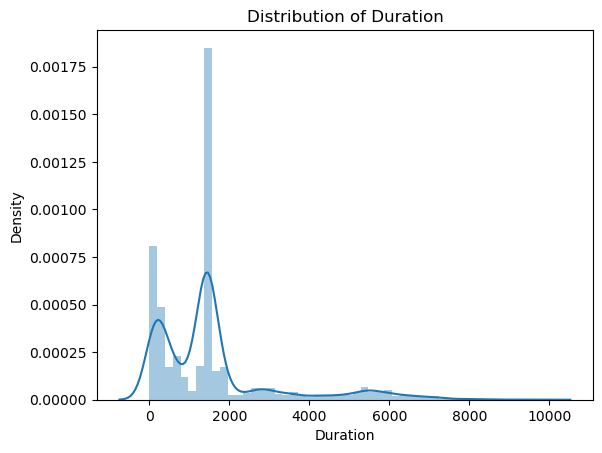

C:\Users\thedh\AppData\Local\Temp\ipykernel_4840\2144921311.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aired, hist = True, kde = True)
c:\Users\thedh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thedh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

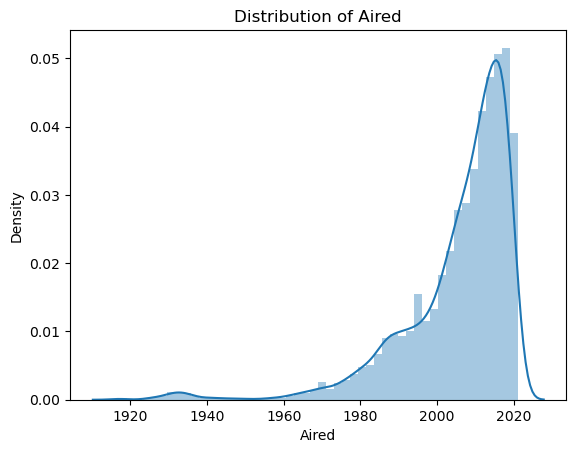

C:\Users\thedh\AppData\Local\Temp\ipykernel_4840\2144921311.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(episodes, hist = True, kde = True)
c:\Users\thedh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thedh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

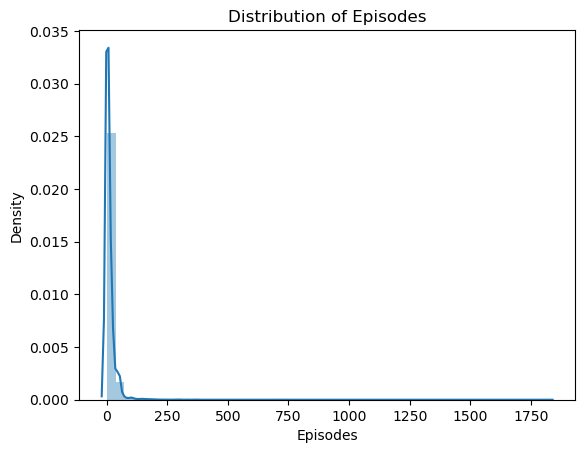

In [12]:
import seaborn as sns

# Drop NaN values from 'Duration' column
duration = df['Duration'].dropna()
aired = df['Aired'].dropna()
episodes = df['Episodes'].dropna()

# Create a histogram with a density curve
sns.distplot(duration, hist = True, kde = True)

plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()
sns.distplot(aired, hist = True, kde = True)
plt.title('Distribution of Aired')
plt.xlabel('Aired')
plt.ylabel('Density')
plt.show()
sns.distplot(episodes, hist = True, kde = True)
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.ylabel('Density')
plt.show()


In [13]:
df = df.drop(['Type', 'Rating', 'Genres', 'Score-1', 'Score-2', 'Score-3', 'Score-4', 'Score-5', 'Score-6', 'Score-7', 'Score-8', 'Score-9', 'Score-10'], axis=1)
# df = df.drop(['Ranked', 'Popularity', 'Members' , 'Favorites' , 'Watching' , 'Completed' , 'On-Hold', 'Dropped' , 'Plan to Watch'], axis=1)
df = df.drop(['Ranked', 'Members' , 'Watching' , 'On-Hold' , 'Dropped', 'Plan to Watch', 'Completed'], axis=1)
# df = df.drop(['Ranked'], axis=1)
df = df.drop(['MAL_ID', 'Name', 'English name' , 'Japanese name' , 'Premiered' , 'Producers', 'Licensors'], axis=1)
df = df.drop(['Source', 'Studios'], axis=1)
# df = df.drop(['Unknown_Genre', 'Unknown_Type'], axis=1)
df = df.drop(['Unknown_Genre','Hentai', 'Yuri', 'Yaoi', 'Popularity', 'Favorites'], axis=1)

In [14]:
for each in df.columns:
    print(each, df[each].dtype)

Score float64
Episodes int64
Aired int64
Duration int64
Action int64
Adventure int64
Comedy int64
Drama int64
Sci-Fi int64
Space int64
Mystery int64
Shounen int64
Police int64
Supernatural int64
Magic int64
Fantasy int64
Sports int64
Josei int64
Romance int64
Slice of Life int64
Cars int64
Seinen int64
Horror int64
Psychological int64
Thriller int64
Super Power int64
Martial Arts int64
School int64
Ecchi int64
Vampire int64
Military int64
Historical int64
Dementia int64
Mecha int64
Demons int64
Samurai int64
Game int64
Shoujo int64
Harem int64
Music int64
Shoujo Ai int64
Shounen Ai int64
Kids int64
Parody int64


In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the 'Aired', 'Completed', 'Dropped', and 'Favorites' columns and transform them
df[['Episodes', 'Duration', 'Aired']] = scaler.fit_transform(df[['Episodes', 'Duration', 'Aired']])
print(df.describe())

              Score      Episodes         Aired      Duration        Action  \
count  10988.000000  1.098800e+04  1.098800e+04  1.098800e+04  10988.000000   
mean       6.556049  1.034645e-17  4.635211e-15  6.207872e-17      0.296232   
std        0.900702  1.000046e+00  1.000046e+00  1.000046e+00      0.456615   
min        1.850000 -2.531462e-01 -6.056394e+00 -9.937893e-01      0.000000   
25%        5.980000 -2.531462e-01 -3.069767e-01 -7.690741e-01      0.000000   
50%        6.570000 -2.310117e-01  3.090323e-01 -1.323812e-01      0.000000   
75%        7.200000 -9.667203e-03  6.512595e-01 -2.002365e-02      1.000000   
max        9.190000  3.996515e+01  1.061932e+00  5.110972e+00      1.000000   

          Adventure        Comedy         Drama        Sci-Fi         Space  \
count  10988.000000  10988.000000  10988.000000  10988.000000  10988.000000   
mean       0.205406      0.406261      0.181835      0.195577      0.037131   
std        0.404016      0.491157      0.385726    

In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split

# 'df' is your DataFrame and 'Score' is the target column
X = df.drop('Score', axis=1)
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

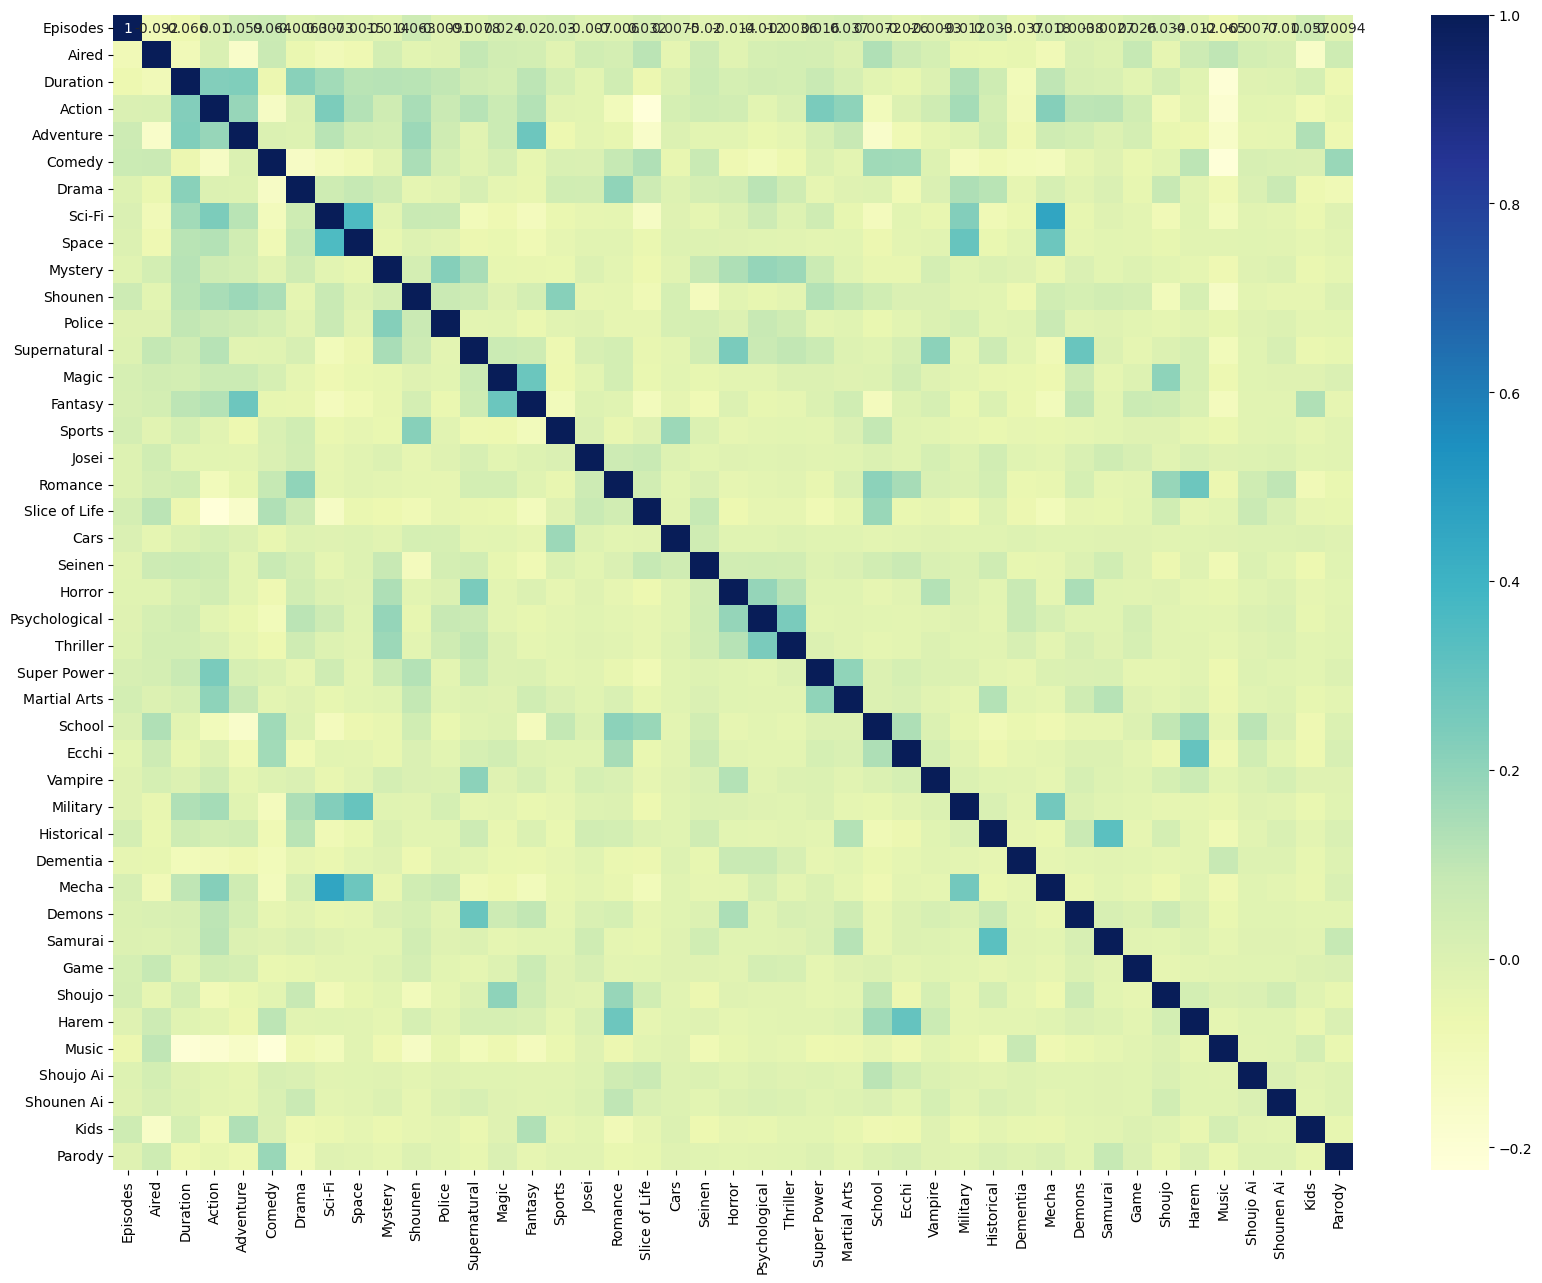

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

# OLS Regression

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_vif(X, index):
    # Create a mask to exclude the feature for which the VIF is being calculated
    mask = np.arange(X.shape[1]) != index

    # Fit a linear regression model for the feature against all other features
    model = LinearRegression()
    model.fit(X.iloc[:, mask], X.iloc[:, index])

    # Calculate the R-squared score
    r_squared = model.score(X.iloc[:, mask], X.iloc[:, index])

    # Calculate and return the VIF
    return 1 / (1 - r_squared)
# Initialize the dataframe that will hold the VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [calculate_vif(X_train, i) for i in range(X_train.shape[1])]

print(vif_data)

          feature       VIF
0        Episodes  1.042837
1           Aired  1.160579
2        Duration  1.263091
3          Action  1.459946
4       Adventure  1.313119
5          Comedy  1.333382
6           Drama  1.209759
7          Sci-Fi  1.529927
8           Space  1.250269
9         Mystery  1.192613
10        Shounen  1.237470
11         Police  1.101400
12   Supernatural  1.290898
13          Magic  1.173716
14        Fantasy  1.334876
15         Sports  1.181448
16          Josei  1.026104
17        Romance  1.271001
18  Slice of Life  1.211052
19           Cars  1.047602
20         Seinen  1.099450
21         Horror  1.153116
22  Psychological  1.164735
23       Thriller  1.103952
24    Super Power  1.142816
25   Martial Arts  1.127445
26         School  1.210893
27          Ecchi  1.188065
28        Vampire  1.072818
29       Military  1.196738
30     Historical  1.226527
31       Dementia  1.081418
32          Mecha  1.393487
33         Demons  1.133845
34        Samurai  1

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Create a LinearRegression instance
model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")

# Print the mean of the cross-validation scores
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.39379476 0.38524742 0.42717784 0.35585521 0.38329699]
Mean cross-validation score: 0.3890744444852515


In [20]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Print the intercept of the model
print(f"Intercept: {model.intercept_}")

# Print the coefficients of each feature
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print the R-squared score and mean squared error
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Intercept: 5.997767895857248
Episodes: 0.06989644472674816
Aired: 0.21017808037688993
Duration: 0.1887118651126748
Action: 0.10860791008714651
Adventure: 0.1571298220869348
Comedy: 0.22906447460921167
Drama: 0.3571826412787387
Sci-Fi: 0.09543270278090529
Space: 0.08877956747588954
Mystery: 0.38337239614885826
Shounen: 0.391174790134776
Police: 0.13856644942698632
Supernatural: 0.27929610737585364
Magic: 0.1061557913618048
Fantasy: 0.13324594344345825
Sports: 0.2802818844977594
Josei: 0.15539500624518357
Romance: 0.2198724976304994
Slice of Life: 0.31328944759474714
Cars: -0.00526311514084437
Seinen: 0.24794761810941626
Horror: -0.3553789597727625
Psychological: 0.3462689699313407
Thriller: 0.32938488576184116
Super Power: 0.13498552470278766
Martial Arts: 0.010657200771677028
School: 0.27323037441829484
Ecchi: -0.18045940280422398
Vampire: 0.14015131299338954
Military: 0.23883797998116654
Historical: 0.222180387777083
Dementia: -0.6428541134573261
Mecha: 0.07911186139294334
Demons: 0.0

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a LinearRegression instance
model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the model to the training data
model.fit(X_train_rfe, y_train)

# Print the features selected by RFE
selected_features = pd.Series(rfe.support_, index = X_train.columns)
print(selected_features[selected_features==True].index)

# Make predictions on the testing data
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)

# Calculate and print the R-squared score and mean squared error
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Index(['Drama', 'Mystery', 'Shounen', 'Supernatural', 'Seinen', 'Horror',
       'Thriller', 'School', 'Military', 'Dementia'],
      dtype='object')
R-squared Score: 0.21703941034741425
Mean Squared Error: 0.6522738753694097
Mean Absolute Error: 0.6324183040492919


# Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
import numpy as np

def calculate_vif(X, index):
    # Create a mask to exclude the feature for which the VIF is being calculated
    mask = np.arange(X.shape[1]) != index

    # Fit a linear regression model for the feature against all other features
    model = Ridge(alpha=1.0)
    model.fit(X.iloc[:, mask], X.iloc[:, index])

    # Calculate the R-squared score
    r_squared = model.score(X.iloc[:, mask], X.iloc[:, index])

    # Calculate and return the VIF
    return 1 / (1 - r_squared)
# Initialize the dataframe that will hold the VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [calculate_vif(X_train, i) for i in range(X_train.shape[1])]

print(vif_data)

          feature       VIF
0        Episodes  1.042836
1           Aired  1.160578
2        Duration  1.263091
3          Action  1.459942
4       Adventure  1.313118
5          Comedy  1.333379
6           Drama  1.209757
7          Sci-Fi  1.529925
8           Space  1.250268
9         Mystery  1.192609
10        Shounen  1.237467
11         Police  1.101399
12   Supernatural  1.290891
13          Magic  1.173715
14        Fantasy  1.334874
15         Sports  1.181436
16          Josei  1.026104
17        Romance  1.270996
18  Slice of Life  1.211050
19           Cars  1.047602
20         Seinen  1.099448
21         Horror  1.153114
22  Psychological  1.164729
23       Thriller  1.103951
24    Super Power  1.142815
25   Martial Arts  1.127444
26         School  1.210890
27          Ecchi  1.188063
28        Vampire  1.072817
29       Military  1.196737
30     Historical  1.226519
31       Dementia  1.081418
32          Mecha  1.393486
33         Demons  1.133844
34        Samurai  1

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Create a LinearRegression instance
model = Ridge(alpha=1.0)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")

# Print the mean of the cross-validation scores
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.39386949 0.38527427 0.42716563 0.35602005 0.38328045]
Mean cross-validation score: 0.38912197750868865


In [24]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Print the intercept of the model
print(f"Intercept: {model.intercept_}")

# Print the coefficients of each feature
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print the R-squared score and mean squared error
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Intercept: 5.998453263613163
Episodes: 0.06993189873110708
Aired: 0.21025885561030208
Duration: 0.18883271864039503
Action: 0.10872078270629593
Adventure: 0.15692679670263598
Comedy: 0.2289378456182972
Drama: 0.35712293514219096
Sci-Fi: 0.09532157959513349
Space: 0.08842115522934534
Mystery: 0.38279624539784785
Shounen: 0.3909298432322851
Police: 0.13795049983944713
Supernatural: 0.2789746195089219
Magic: 0.10599287803150093
Fantasy: 0.13295068429352846
Sports: 0.2792970658883636
Josei: 0.15340292670449612
Romance: 0.21979592790217775
Slice of Life: 0.3129143796349504
Cars: -0.005048146066614262
Seinen: 0.2475082921401124
Horror: -0.353656844188653
Psychological: 0.3448026052414498
Thriller: 0.32596694011794974
Super Power: 0.1345068106916496
Martial Arts: 0.01068363515152391
School: 0.2730292102585471
Ecchi: -0.18011998295790185
Vampire: 0.1385371061543742
Military: 0.2380764493147881
Historical: 0.2218795759198596
Dementia: -0.6405193519884678
Mecha: 0.07894076265857762
Demons: 0.065

In [25]:
from sklearn.feature_selection import RFE

# Create a LinearRegression instance
model = Ridge(alpha=1.0)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the model to the training data
model.fit(X_train_rfe, y_train)

# Print the features selected by RFE
selected_features = pd.Series(rfe.support_, index = X_train.columns)
print(selected_features[selected_features==True].index)

# Make predictions on the testing data
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)

# Calculate and print the R-squared score and mean squared error
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Index(['Drama', 'Mystery', 'Shounen', 'Supernatural', 'Seinen', 'Horror',
       'Psychological', 'School', 'Military', 'Dementia'],
      dtype='object')
R-squared Score: 0.21914579690450875
Mean Squared Error: 0.650519073223836
Mean Absolute Error: 0.6311386435083743


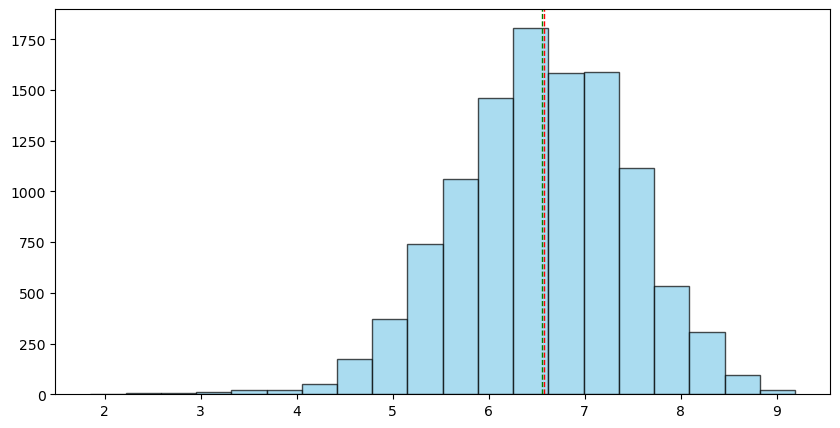

In [26]:
# plot df scores distribution with median and mean
plt.figure(figsize=(10, 5))
plt.hist(df['Score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Score'].median(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Score'].mean(), color='green', linestyle='dashed', linewidth=1)

In [27]:
# check_df = df.drop(['Score', 'Episodes', 'Aired', 'Duration', 'Popularity'], axis=1)
# print(len(check_df.columns))
# print(check_df.columns)
# print(len(df.columns))

In [28]:
# add a new column to the dataframe classifying score as 0 or 1 at 7.0
df['Score_Class'] = df['Score'].apply(lambda x: 1 if x >= 7.0 else 0)

In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers

# Define your features and target variable
X = df.drop(['Score', 'Score_Class'], axis=1)
y = df['Score_Class']

# def custom_leaky_relu(x):
#     return tf.nn.leaky_relu(x, alpha=0.02)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% for training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% for validation, 15% for testing

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)),
    # tf.keras.layers.Dense(64, activation=custom_leaky_relu, kernel_regularizer=regularizers.l2(0.001)),
    # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='categorical_hinge', optimizer='nadam', metrics=['accuracy'])


# Train the model with validation data
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30
481/481 [==============================] - 2s 2ms/step - loss: 1.0445 - accuracy: 0.7253 - val_loss: 0.9880 - val_accuracy: 0.7700
Epoch 2/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9636 - accuracy: 0.7441 - val_loss: 0.9611 - val_accuracy: 0.7585
Epoch 3/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9483 - accuracy: 0.7440 - val_loss: 0.9492 - val_accuracy: 0.7646
Epoch 4/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9387 - accuracy: 0.7484 - val_loss: 0.9451 - val_accuracy: 0.7652
Epoch 5/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9360 - accuracy: 0.7488 - val_loss: 0.9427 - val_accuracy: 0.7664
Epoch 6/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9344 - accuracy: 0.7467 - val_loss: 0.9422 - val_accuracy: 0.7658
Epoch 7/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9323 - accuracy: 0.7472 - val_loss: 0.9382 - val_accuracy: 0.7627
Epoch 

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Predict the probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities into classes
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print the classification report
print(classification_report(y_test, y_pred))

52/52 [==============================] - 0s 929us/step - loss: 0.9274 - accuracy: 0.7635
Test accuracy: 0.763493001461029
52/52 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1122
           1       0.66      0.53      0.59       527

    accuracy                           0.76      1649
   macro avg       0.73      0.70      0.71      1649
weighted avg       0.75      0.76      0.76      1649



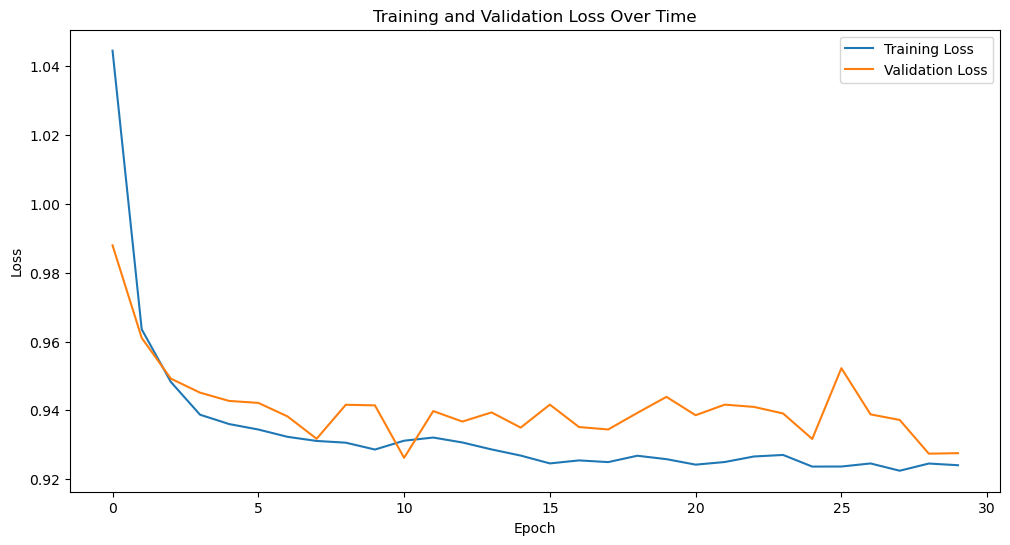

In [31]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
481/481 [==============================] - 1s 2ms/step - loss: 1.0444 - accuracy: 0.7247 - val_loss: 0.9867 - val_accuracy: 0.7621
Epoch 2/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9626 - accuracy: 0.7428 - val_loss: 0.9614 - val_accuracy: 0.7682
Epoch 3/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9461 - accuracy: 0.7483 - val_loss: 0.9517 - val_accuracy: 0.7621
Epoch 4/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9407 - accuracy: 0.7470 - val_loss: 0.9455 - val_accuracy: 0.7603
Epoch 5/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9364 - accuracy: 0.7466 - val_loss: 0.9445 - val_accuracy: 0.7585
Epoch 6/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9350 - accuracy: 0.7457 - val_loss: 0.9503 - val_accuracy: 0.7512
Epoch 7/30
481/481 [==============================]

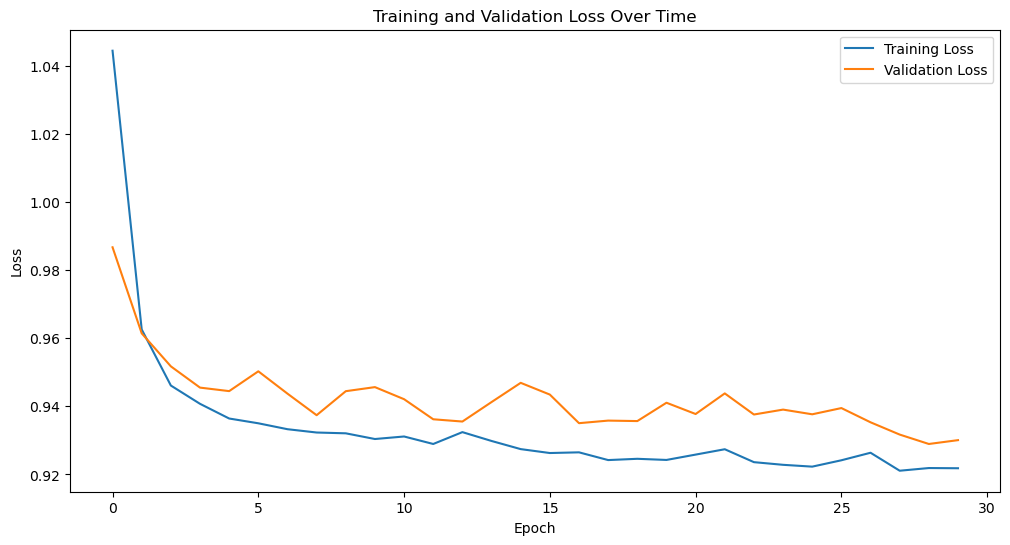

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/30
481/481 [==============================] - 1s 2ms/step - loss: 1.0466 - accuracy: 0.7267 - val_loss: 0.9857 - val_accuracy: 0.7621
Epoch 2/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9646 - accuracy: 0.7471 - val_loss: 0.9564 - val_accuracy: 0.7664
Epoch 3/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9479 - accuracy: 0.7459 - val_loss: 0.9523 - val_accuracy: 0.7633
Epoch 4/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9412 - accuracy: 0.7467 - val_loss: 0.9460 - val_accuracy: 0.7633
Epoch 5/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9374 - accuracy: 0.7474 - val_loss: 0.9420 - val_accuracy: 0.7640
Epoch 6/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9345 - accuracy: 0.7472 - val_loss: 0.9390 - val_accuracy: 0.7670
Epoch 7/30
481/481 [==============================]

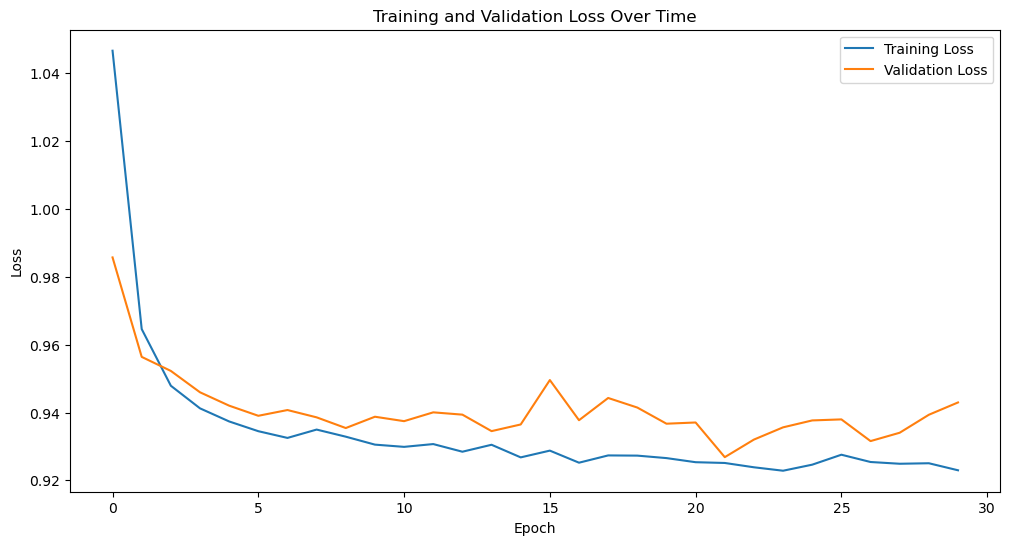

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/30
481/481 [==============================] - 1s 2ms/step - loss: 1.0433 - accuracy: 0.7255 - val_loss: 0.9849 - val_accuracy: 0.7549
Epoch 2/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9629 - accuracy: 0.7432 - val_loss: 0.9535 - val_accuracy: 0.7743
Epoch 3/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9463 - accuracy: 0.7448 - val_loss: 0.9510 - val_accuracy: 0.7561
Epoch 4/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9400 - accuracy: 0.7436 - val_loss: 0.9507 - val_accuracy: 0.7506
Epoch 5/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9368 - accuracy: 0.7461 - val_loss: 0.9441 - val_accuracy: 0.7633
Epoch 6/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9335 - accuracy: 0.7487 - val_loss: 0.9421 - val_accuracy: 0.7621
Epoch 7/30
481/481 [==============================]

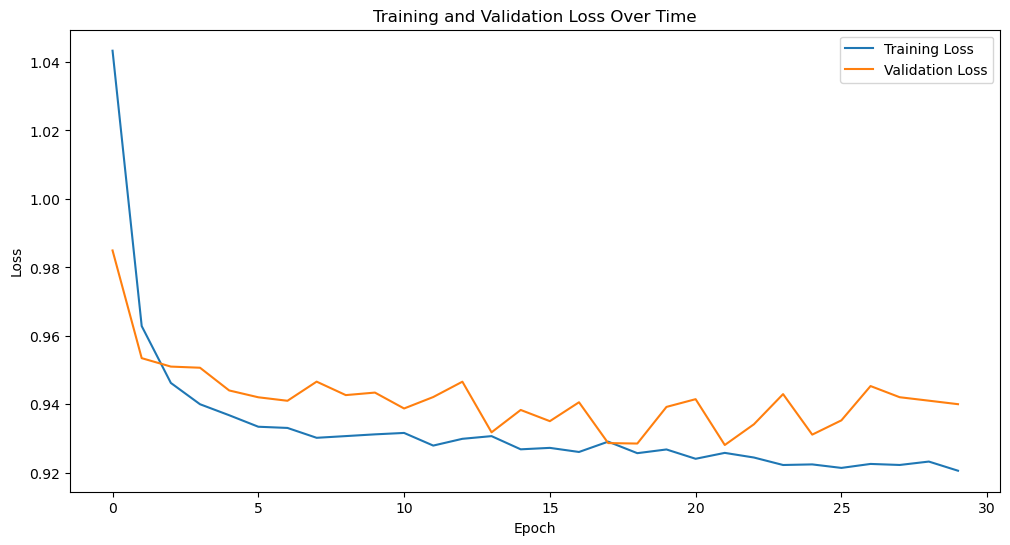

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/30
481/481 [==============================] - 1s 1ms/step - loss: 1.0473 - accuracy: 0.7225 - val_loss: 0.9883 - val_accuracy: 0.7530
Epoch 2/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9632 - accuracy: 0.7476 - val_loss: 0.9527 - val_accuracy: 0.7712
Epoch 3/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9468 - accuracy: 0.7452 - val_loss: 0.9495 - val_accuracy: 0.7646
Epoch 4/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9399 - accuracy: 0.7467 - val_loss: 0.9462 - val_accuracy: 0.7627
Epoch 5/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9387 - accuracy: 0.7437 - val_loss: 0.9484 - val_accuracy: 0.7603
Epoch 6/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9353 - accuracy: 0.7459 - val_loss: 0.9484 - val_accuracy: 0.7542
Epoch 7/30
481/481 [==============================]

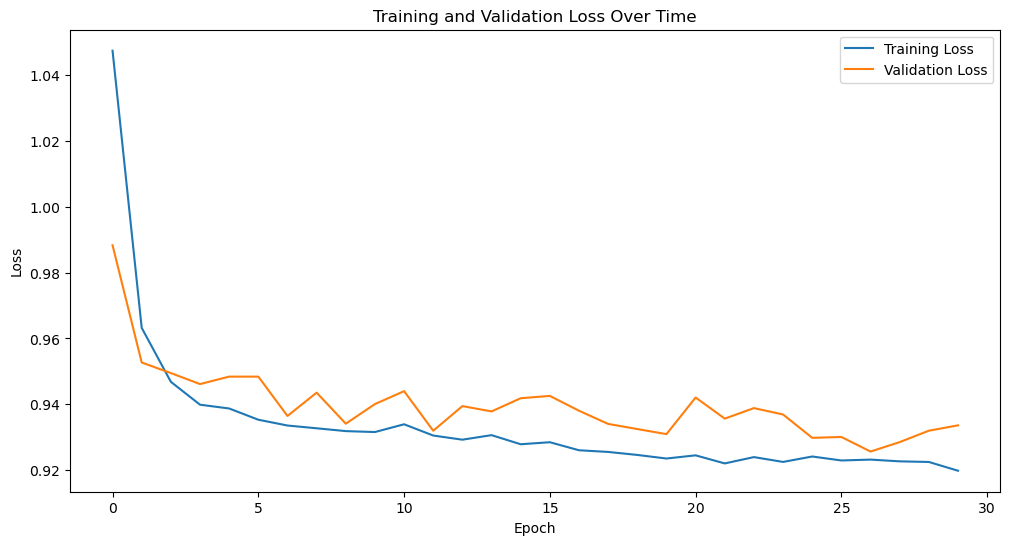

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/30
481/481 [==============================] - 1s 2ms/step - loss: 1.0422 - accuracy: 0.7220 - val_loss: 0.9869 - val_accuracy: 0.7597
Epoch 2/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9623 - accuracy: 0.7448 - val_loss: 0.9544 - val_accuracy: 0.7725
Epoch 3/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9470 - accuracy: 0.7472 - val_loss: 0.9555 - val_accuracy: 0.7530
Epoch 4/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9402 - accuracy: 0.7465 - val_loss: 0.9491 - val_accuracy: 0.7579
Epoch 5/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9343 - accuracy: 0.7505 - val_loss: 0.9454 - val_accuracy: 0.7591
Epoch 6/30
481/481 [==============================] - 1s 1ms/step - loss: 0.9324 - accuracy: 0.7494 - val_loss: 0.9504 - val_accuracy: 0.7488
Epoch 7/30
481/481 [==============================]

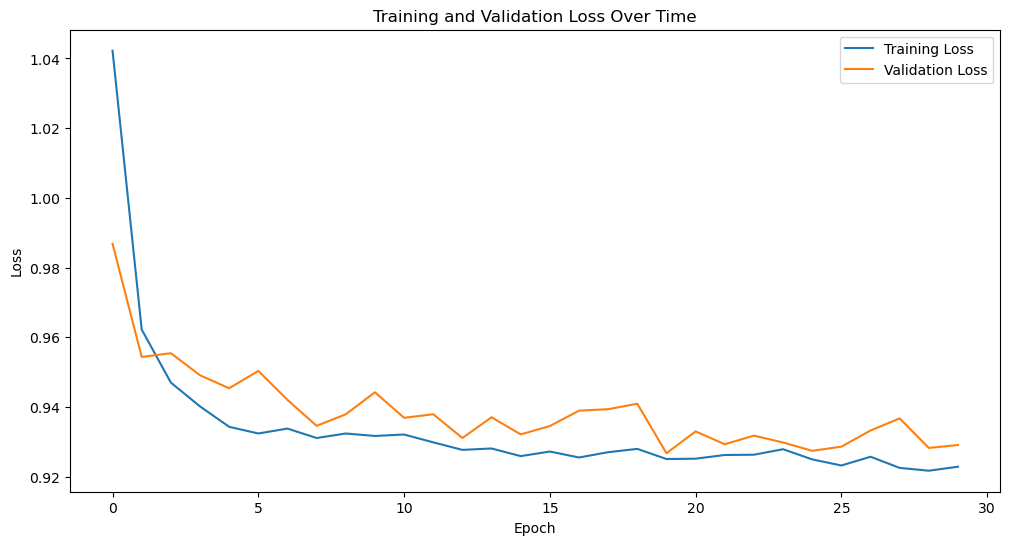

In [32]:
from sklearn.model_selection import StratifiedKFold

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
accuracies = [] 
for train, test in kfold.split(X, y):

  # Split the data into training, validation, and test sets
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% for training
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% for validation, 15% for testing

  # Normalize the feature data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)
  X_test = scaler.transform(X_test)

  # Define the model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Compile the model
  model.compile(loss='categorical_hinge', optimizer='nadam', metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), verbose=1)

  # Calculate the accuracy
  loss, accuracy = model.evaluate(X_test, y_test)
  accuracies.append(accuracy)

  plt.figure(figsize=(12, 6))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss Over Time')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Increase fold number
  fold_no = fold_no + 1

In [33]:
# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy: {mean_accuracy}')
print(accuracies)

Mean accuracy: 0.7596118807792663
[0.7628865838050842, 0.7628865838050842, 0.7537901997566223, 0.7586416006088257, 0.7598544359207153]


In [34]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.preprocessing import StandardScaler

# def custom_leaky_relu(x):
#     return tf.nn.leaky_relu(x, alpha=0.02)

# X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# # Scale the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)


# # Create a Sequential model
# model = Sequential()

# # Add an input layer and two hidden layers with 10 neurons each
# model.add(Dense(7, input_dim=X_train.shape[1], activation=custom_leaky_relu))
# model.add(Dense(7, activation=custom_leaky_relu))
# model.add(Dense(7, activation=custom_leaky_relu))
# model.add(Dense(7, activation=custom_leaky_relu))



# # Add an output layer with 1 neuron (since this is a regression problem)
# model.add(Dense(1))

# # Compile the model
# model.compile(loss='mse', optimizer='rmsprop')

# # Fit the model to the training data
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16, verbose=1)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Calculate and print the R-squared score and mean squared error
# print(f"R-squared Score: {r2_score(y_test, y_pred)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

In [35]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()